# Credit Card Fraud Detection
Credit Card Fraud is a common problem. One way to fight this problem is by using data of the credit card holders. If we can find unusual patterns in the data collected from cardholder A, this could indicate a fraud. Machine Learning can be applied to find these unusual patterns. This is what this project is about. This project lives in a Notebook and I use the Anaconda distribution of Python. Anaconda makes package management easy. Before beginning this project, I create a virtual environment to isolate this project from others with respect to dependencies and its versions. 

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np

#Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## 1. Import and explore the data

### 1.1 Import the data
I will import the data from Kaggle using the Kaggle API. The following links are used to learn how the Kaggle API works. 
- Kaggle API Docs: https://www.kaggle.com/docs/api
- Kaggle API Github docs: https://github.com/Kaggle/kaggle-api

If Amazon SageMaker is used, the following article will help: 
- Article: https://freddiek.github.io/2018/06/10/accessing-Kaggle-from-SageMaker-instance.html

Step 1: Go to Kaggle and generate the API Key, which will download a kaggle.json file. If you are working from your local machine, put the kaggle.json file in C:\Users(windows-username)\.kaggle\kaggle.json. If working with Amazon SageMaker, this file should be put in this notebook working directory.
    
Step 2: Execute the following command. The first one will install the kaggle package. Then, the kaggle.json file will be moved to the location in this virtual environment where Kaggle expects it to be. And last we will download the dataset. 



In [2]:
#First pip install kaggle
!pip install kaggle

#If SageMaker is used: Move API key to where Kaggle expects it
#!mv /home/ec2-user/SageMaker/ML_SageMaker_Studies/Payment_Fraud_Detection/kaggle.json /home/ec2-user/.kaggle

#If SageMaker is used: Make our kaggle.json file unreadable for others
#!chmod 600 /home/ec2-user/.kaggle/kaggle.json

#List the datasets matching the keyword "Fraud"
!kaggle datasets list -s Fraud

ref                                                                   title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mlg-ulb/creditcardfraud                                               Credit Card Fraud Detection                         66MB  2018-03-23 01:17:27         245710       6148  0.85294116       
ntnu-testimon/paysim1                                                 Synthetic Financial Datasets For Fraud Detection   178MB  2017-04-03 08:40:34          33238        754  0.88235295       
rtatman/fraudulent-email-corpus                                       Fraudulent E-mail Corpus                             6MB  2017-07-25 18:41:30           4246         91  0.875            
mishra5001/credit-card             

From the above response we need to find the dataset we want to use. That is: Credit Card Fraud Detection. Now we can download the dataset. 

In [3]:
!kaggle datasets download --unzip "mlg-ulb/creditcardfraud"


  0%|          | 0.00/66.0M [00:00<?, ?B/s]
  2%|1         | 1.00M/66.0M [00:00<00:11, 5.78MB/s]
  3%|3         | 2.00M/66.0M [00:00<00:11, 5.75MB/s]
  5%|4         | 3.00M/66.0M [00:00<00:11, 5.62MB/s]
  6%|6         | 4.00M/66.0M [00:00<00:11, 5.47MB/s]
  8%|7         | 5.00M/66.0M [00:00<00:11, 5.66MB/s]
  9%|9         | 6.00M/66.0M [00:01<00:10, 5.85MB/s]
 11%|#         | 7.00M/66.0M [00:01<00:10, 5.95MB/s]
 12%|#2        | 8.00M/66.0M [00:01<00:09, 6.34MB/s]
 14%|#3        | 9.00M/66.0M [00:01<00:09, 6.54MB/s]
 15%|#5        | 10.0M/66.0M [00:01<00:08, 7.02MB/s]
 17%|#6        | 11.0M/66.0M [00:01<00:08, 6.92MB/s]
 18%|#8        | 12.0M/66.0M [00:01<00:08, 7.04MB/s]
 20%|#9        | 13.0M/66.0M [00:02<00:08, 6.79MB/s]
 21%|##1       | 14.0M/66.0M [00:02<00:08, 6.77MB/s]
 23%|##2       | 15.0M/66.0M [00:02<00:07, 6.79MB/s]
 24%|##4       | 16.0M/66.0M [00:02<00:07, 6.79MB/s]
 26%|##5       | 17.0M/66.0M [00:02<00:07, 6.88MB/s]
 27%|##7       | 18.0M/66.0M [00:02<00:07, 6.82MB/s]
 

### 1.2 Explore the data

#### 1.2.1 Observing the data

In [4]:
#Read the data in 
fraud_data = pd.read_csv("creditcard.csv")

In [5]:
#Look at the data
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Features of the dataset:
- Time: The time elapsed in seconds since the first transaction
- V1...V28: Principal components obtained from PCA
- Amount: The transaction amount

In [6]:
#Shape of the data
fraud_data.shape

(284807, 31)

In [7]:
#Look at the columns of the data
fraud_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
#Look at the type of each column
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
#Look at statistics of each column
fraud_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
#Look at the target variable
fraud_data["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
print("Only {} % of the dataset are fraudulent transactions.".format(round(fraud_data["Class"].value_counts()[1] / len(fraud_data) * 100, 4)))

Only 0.1727 % of the dataset are fraudulent transactions.


We see that a very low percentage of the samples are fraudulant. This means that the dataset is highly imbalanced. 

#### 1.2.2 Check for missing values

In [13]:
fraud_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### 1.2.3 Analyse relationships between features

##### Correlation matrix

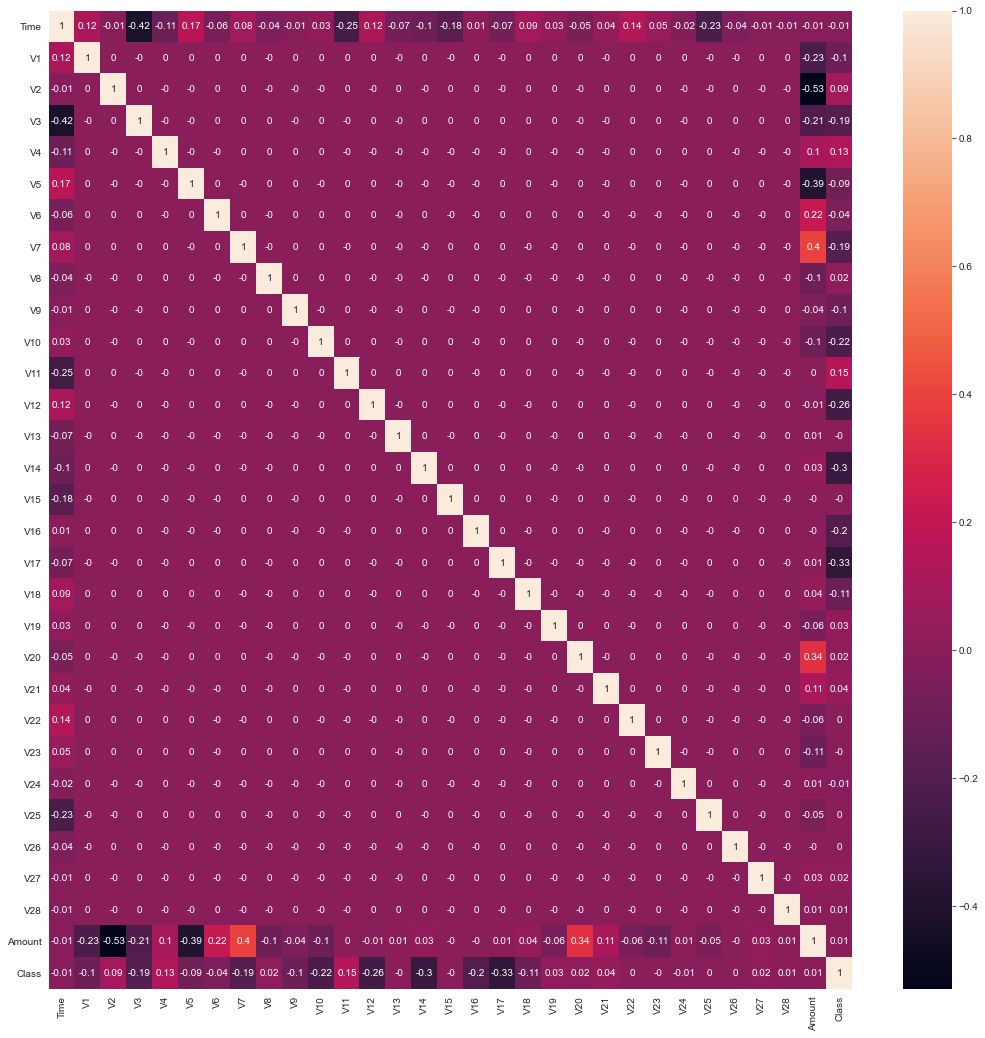

In [14]:
corr = fraud_data.corr()
fig = plt.figure(figsize=(18,18))
sns.heatmap(round(corr,2), annot=True)
plt.show()

Because the principal components V1-V28 came from a PCA, they are orthogonal to each other, which means they are not correlated. Thats why we have a lot of zero values in the middle. 

In [15]:
round(corr, 2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.00,0.12,-0.01,-0.42,-0.11,0.17,-0.06,0.08,-0.04,-0.01,...,0.04,0.14,0.05,-0.02,-0.23,-0.04,-0.01,-0.01,-0.01,-0.01
V1,0.12,1.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,...,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,-0.23,-0.10
V2,-0.01,0.00,1.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,...,0.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.53,0.09
V3,-0.42,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.21,-0.19
V4,-0.11,0.00,-0.00,-0.00,1.00,-0.00,-0.00,0.00,0.00,0.00,...,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.10,0.13
V5,0.17,0.00,-0.00,-0.00,-0.00,1.00,0.00,-0.00,0.00,0.00,...,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,-0.39,-0.09
V6,-0.06,0.00,0.00,0.00,-0.00,0.00,1.00,0.00,-0.00,0.00,...,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.22,-0.04
V7,0.08,0.00,0.00,0.00,0.00,-0.00,0.00,1.00,-0.00,0.00,...,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.40,-0.19
V8,-0.04,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,1.00,0.00,...,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.10,0.02
V9,-0.01,0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,0.00,1.00,...,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.04,-0.10


##### Scatterplots

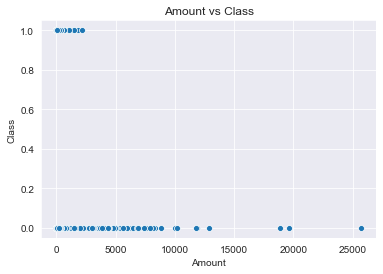

In [16]:
sns.scatterplot(data=fraud_data, x="Amount", y="Class")
plt.title("Amount vs Class")
plt.show()

Observe that amounts under 3000 dollars are the only fraudulent transactions.

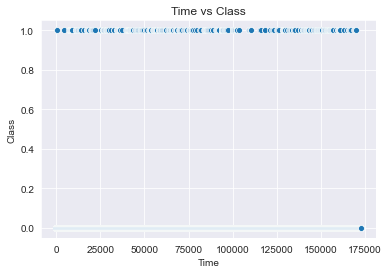

In [17]:
sns.scatterplot(data=fraud_data, x="Time", y="Class")
plt.title("Time vs Class")
plt.show()

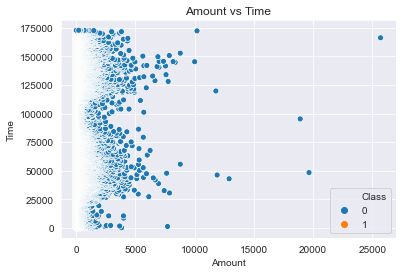

In [18]:
sns.scatterplot(data=fraud_data, x="Amount", y="Time", hue="Class")
plt.title("Amount vs Time")
plt.show()

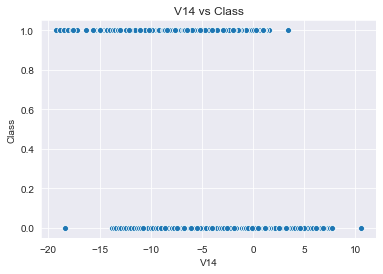

In [19]:
sns.scatterplot(data=fraud_data, x="V14", y="Class")
plt.title("V14 vs Class")
plt.show()

##### Histograms

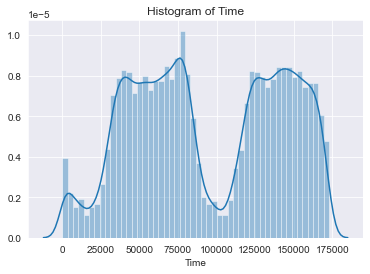

In [20]:
sns.distplot(fraud_data["Time"])
plt.title("Histogram of Time")
plt.show()

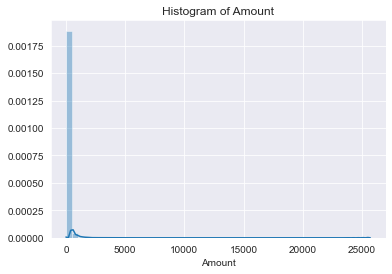

In [21]:
sns.distplot(fraud_data["Amount"])
plt.title("Histogram of Amount")
plt.show()

Plot the distributions of V1-V28 in order.

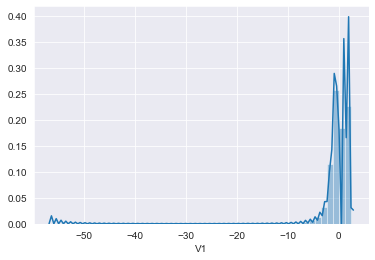

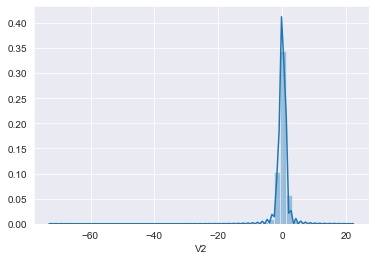

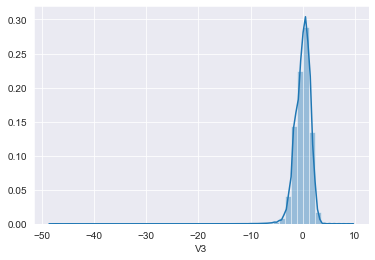

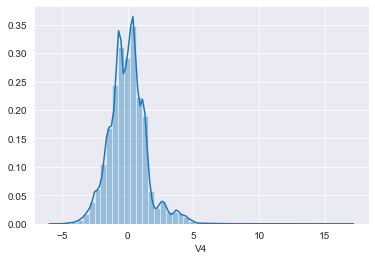

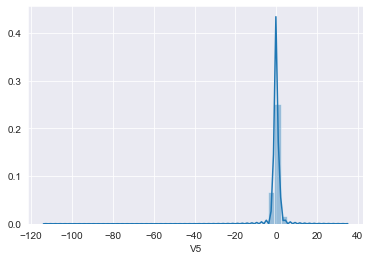

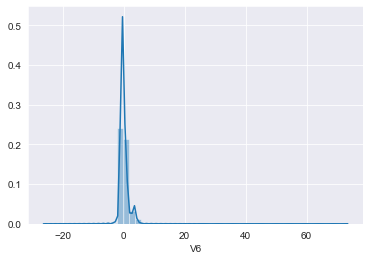

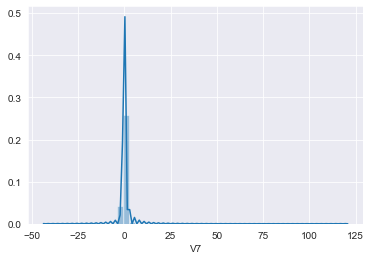

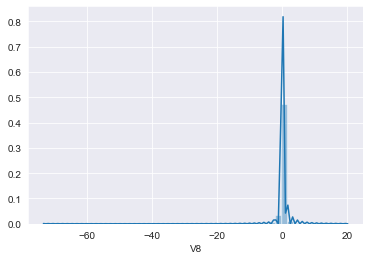

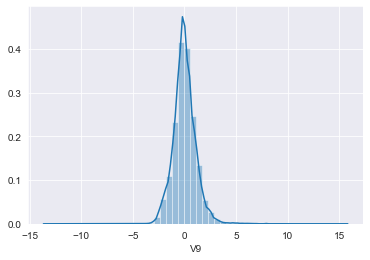

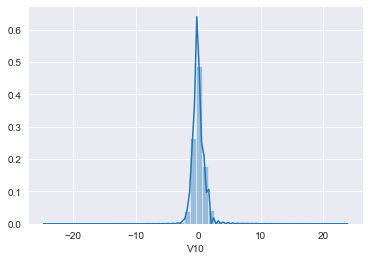

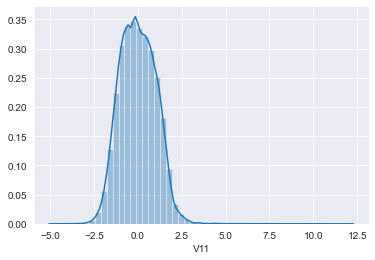

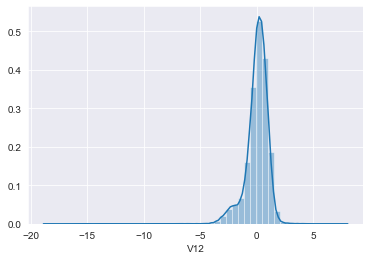

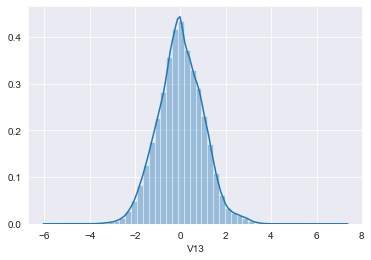

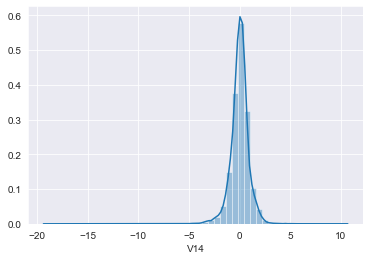

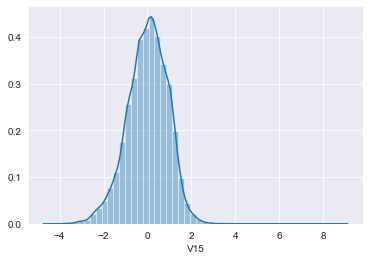

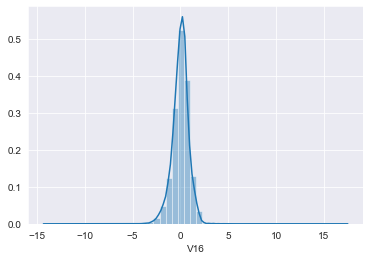

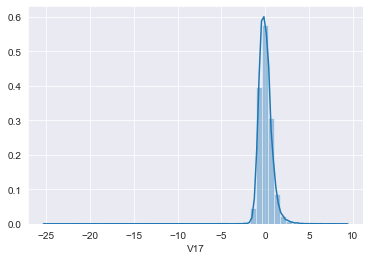

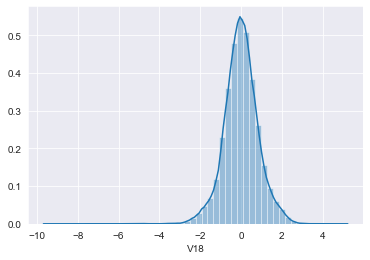

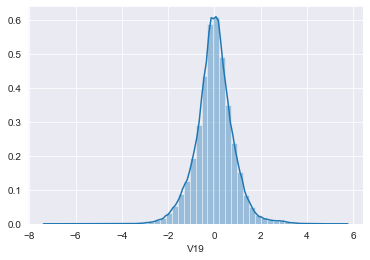

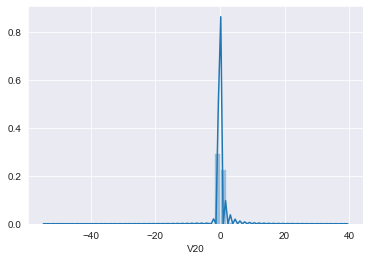

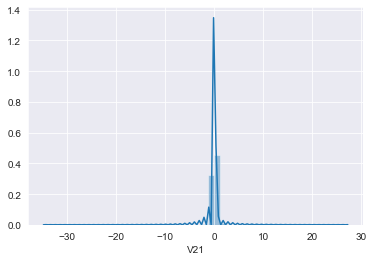

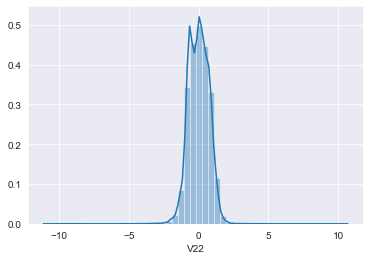

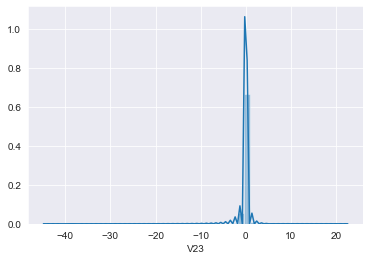

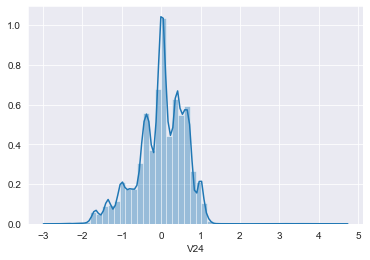

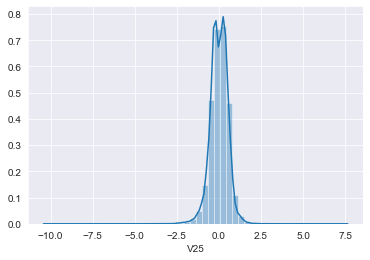

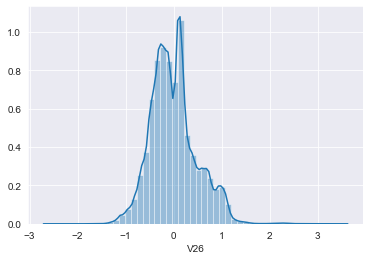

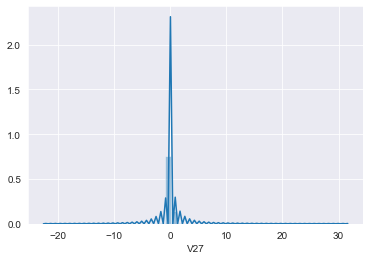

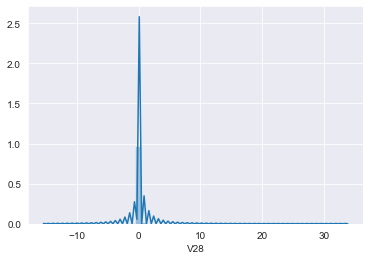

In [22]:
#Data with only the principal components V1-V28
data_pc = fraud_data.drop(["Time", "Amount", "Class"], axis=1)
#print(data_pc.columns)


for i in list(data_pc.columns):
    sns.distplot(fraud_data[i])
    plt.show()

##### Barplots

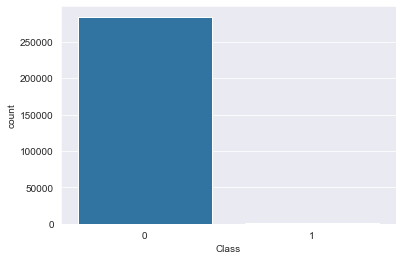

In [23]:
sns.countplot(data=fraud_data, x="Class")
plt.show()

Again we see that the dataset is highly imbalanced. 

##### Boxplots

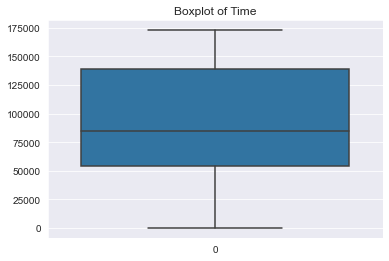

In [24]:
sns.boxplot(data=fraud_data["Time"])
plt.title("Boxplot of Time")
plt.show()

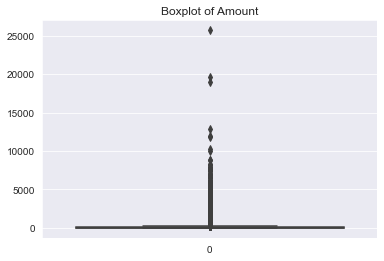

In [25]:
sns.boxplot(data=fraud_data["Amount"])
plt.title("Boxplot of Amount")
plt.show()

## 2. Preprocess the data

### 2.1 Scale the Time and Amount features

We want to scale the "Time" and "Amount" features. As we saw earlier, the "Amount" feature has many outliers. We will use RobustScaler. This scaler is robust to outliers because it uses the median and IQR (interquartile range). 

In [26]:
#Scaling Amount feature
from sklearn.preprocessing import RobustScaler

#Create scaler object
rob_scaler = RobustScaler()

#Scale the data
fraud_data["Amount"] = rob_scaler.fit_transform(fraud_data[["Amount"]])

#See the scaled data
print(fraud_data["Amount"])


0         1.783274
1        -0.269825
2         4.983721
3         1.418291
4         0.670579
            ...   
284802   -0.296653
284803    0.038986
284804    0.641096
284805   -0.167680
284806    2.724796
Name: Amount, Length: 284807, dtype: float64


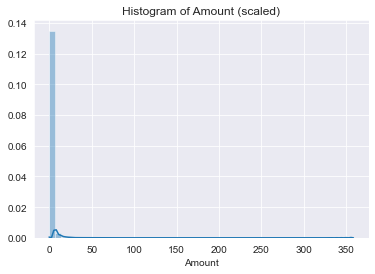

In [27]:
#Plot the scaled data
sns.distplot(fraud_data["Amount"])
plt.title("Histogram of Amount (scaled)")
plt.show()

0        -0.994983
1        -0.994983
2        -0.994972
3        -0.994972
4        -0.994960
            ...   
284802    1.034951
284803    1.034963
284804    1.034975
284805    1.034975
284806    1.035022
Name: Time, Length: 284807, dtype: float64


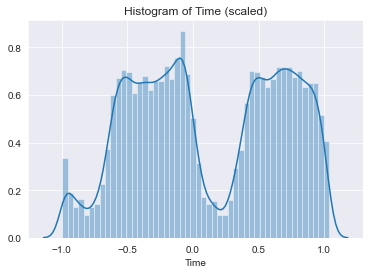

In [28]:
#Scaling Time feature
fraud_data["Time"] = rob_scaler.fit_transform(fraud_data[["Time"]])

#See the scaled data
print(fraud_data["Time"])

#Plot the scaled data
sns.distplot(fraud_data["Time"])
plt.title("Histogram of Time (scaled)")
plt.show()

### 2.2 Split the data in a train and testset
We want to split the dataset in a train and testset to be able to evaluate our model. But we want the train and testset to come from the same distribtion: that is, when splitting the data, we want for both the train and testset the same ratio between fraudulent and non-fraudulent transactions. 

In [29]:
fraud_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


In [30]:
from sklearn.model_selection import train_test_split

#Split the features from the label (also converting Dataframes to arrays)
y = np.array(fraud_data["Class"])
X = np.array(fraud_data.drop("Class", axis=1))

#Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [31]:
#See the distribution of the trainset
y_train = pd.DataFrame(y_train)
y_train.columns = ["Class"]
y_train_dist = y_train["Class"].value_counts()
print("y_train distribution \n{}".format(y_train_dist))
print("Percentage of fraudulent vs non-fraudulent (trainset): {}".format(y_train_dist[1] / y_train_dist[0]))

#See the distribution of the testset
y_test = pd.DataFrame(y_test)
y_test.columns = ["Class"]
y_test_dist = y_test["Class"].value_counts()
print("\ny_test distribution \n{}".format(y_test_dist))
print("Percentage of fraudulent vs non-fraudulent (testset): {}".format(y_test_dist[1] / y_test_dist[0]))

y_train distribution 
0    227454
1       391
Name: Class, dtype: int64
Percentage of fraudulent vs non-fraudulent (trainset): 0.0017190289025473282

y_test distribution 
0    56861
1      101
Name: Class, dtype: int64
Percentage of fraudulent vs non-fraudulent (testset): 0.0017762614094018747


### 2.3 Handle the Imbalance in the dataset

Imbalanced datasets are a special case for classification problem where the distribution of the class is not uniform. Typically, you have a majority class and a minority class. Just as in our data, we have non-fraudulent transactions (majority class) and fraudulent transaction (minority class). 

I will use undersampling to reduce the amount of non-fraudulent samples. First lets see how many samples are fraudulent so that we can create a 50/50 ratio balanced dataset. 

In [32]:
fraudulent_count = y_train["Class"].value_counts()[1]
print(fraudulent_count)

391


This means we want trainset with 391 samples which are fraudulent and 391 which are non-fraudulent. 

In [33]:
#Concatenate the X and y from the trainset
train_data = pd.DataFrame(X_train)
train_data["Class"] = y_train

print(train_data["Class"].value_counts())

0    227454
1       391
Name: Class, dtype: int64


In [40]:
#First suffle the train data
train_data = train_data.sample(frac=1, random_state=42)

#Seperate the fraudulent and non-fraudulent transactions
fraud = train_data[train_data["Class"] == 1]
non_fraud = train_data[train_data["Class"] == 0]

#Undersample from the non-fraudulent data
non_fraud = non_fraud.iloc[:391]

#Concatenate the data together
undersampled_data = pd.concat([fraud, non_fraud], axis=0)

#Change the column names
undersampled_data.columns = fraud_data.columns

#Check the results
print("Length of undersampled data: {}\n".format(len(undersampled_data)))
print(undersampled_data["Class"].value_counts())

Length of undersampled data: 782

1    391
0    391
Name: Class, dtype: int64


In [41]:
#See the undersampled data
undersampled_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
27747,0.182462,-19.641857,14.706335,-22.801238,12.114672,-14.898113,0.840778,-28.011293,-11.919639,-8.960922,...,-8.228874,3.318178,2.585212,0.195009,-1.194803,0.038423,-4.126746,-0.645329,-0.275554,1
48502,0.677898,-3.367770,0.099249,-6.148487,3.401955,0.458307,-1.571630,-1.358708,0.672409,-3.188001,...,0.861308,1.249301,1.850627,-0.117471,1.219815,0.000251,1.036011,0.004367,4.164186,1
27742,-0.675208,-25.266355,14.323254,-26.823673,6.349248,-18.664251,-4.647403,-17.971212,16.633103,-3.768351,...,1.780701,-1.861318,-1.188167,0.156667,1.768192,-0.219916,1.411855,0.414656,1.089779,1
70091,-0.238255,-1.348042,2.522821,-0.782432,4.083047,-0.662280,-0.598776,-1.943552,-0.329579,-1.853274,...,1.079871,-0.352026,-0.218358,0.125866,-0.074180,0.179116,0.612580,0.234206,-0.293440,1
209894,-0.698563,-16.598665,10.541751,-19.818982,6.017295,-13.025901,-4.128779,-14.118865,11.161144,-4.099551,...,1.725853,-1.151606,-0.680052,0.108176,1.066878,-0.233720,1.707521,0.511423,1.089779,1


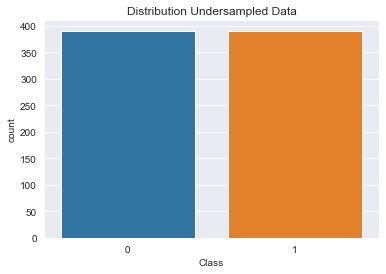

In [42]:
#See the distribution of the training data 
sns.countplot(undersampled_data["Class"])
plt.title("Distribution Undersampled Data")
plt.show()

### 2.4 EDA on Undersampled Dataset
With the undersampling method, we lost a lot of information. Lets look at the correlations in our new dataset. 

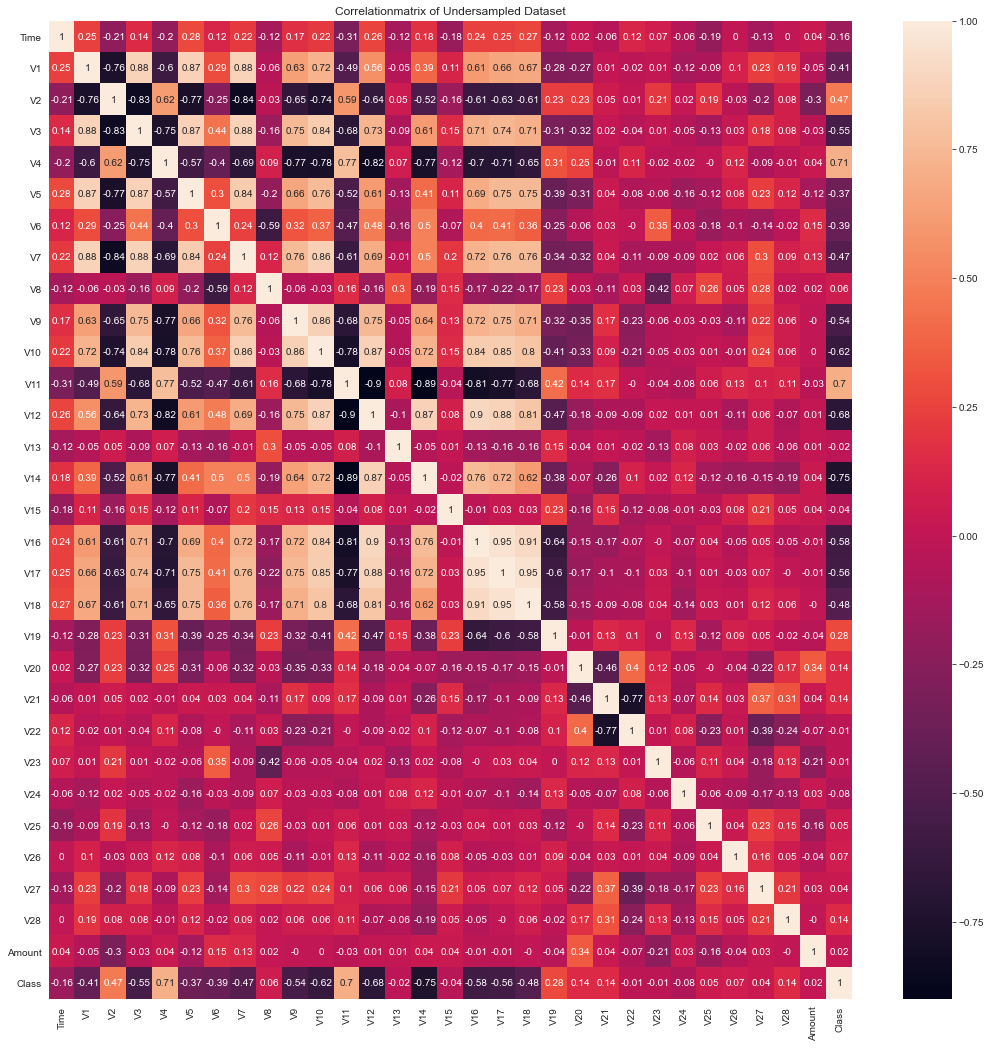

In [44]:
#Correlation matrix from the undersampled data
corr_undersampled = undersampled_data.corr()
fig = plt.figure(figsize=(18,18))
sns.heatmap(round(corr_undersampled,2), annot=True)
plt.title("Correlationmatrix of Undersampled Dataset")
plt.show()

From the above correlationmatrix we see the following:
- V2, V4, V11 and V19 are positively correlated with "Class" (target variable).
- V14, V12, V10, V17 and a few more are negatively correlated with "Class". 

Lets plot some boxplots and see the relationships between the features and the label. 

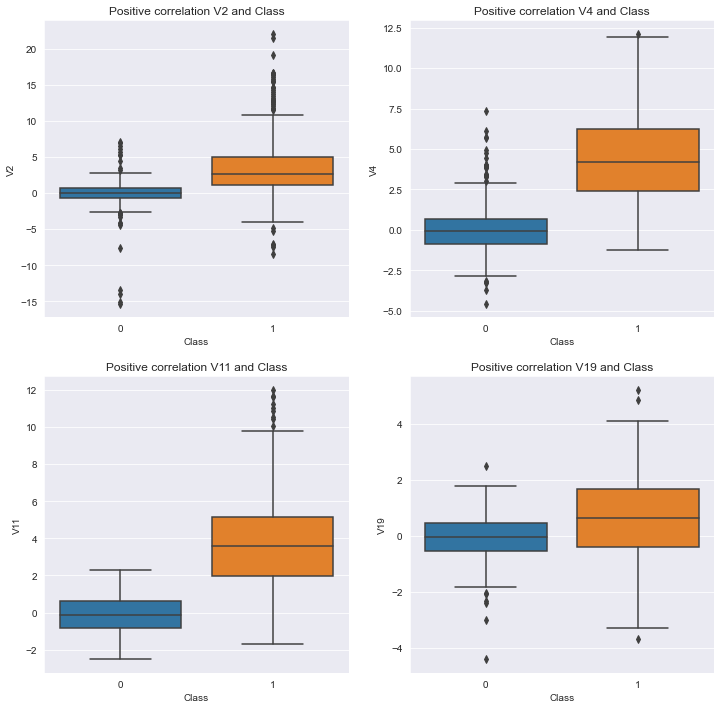

In [52]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

#V2 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V2", ax=axes[0][0])
axes[0][0].set_title("Positive correlation V2 and Class")

#V4 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V4", ax=axes[0][1])
axes[0][1].set_title("Positive correlation V4 and Class")

#V11 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V11", ax=axes[1][0])
axes[1][0].set_title("Positive correlation V11 and Class")

#V19 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V19", ax=axes[1][1])
axes[1][1].set_title("Positive correlation V19 and Class")

plt.show()

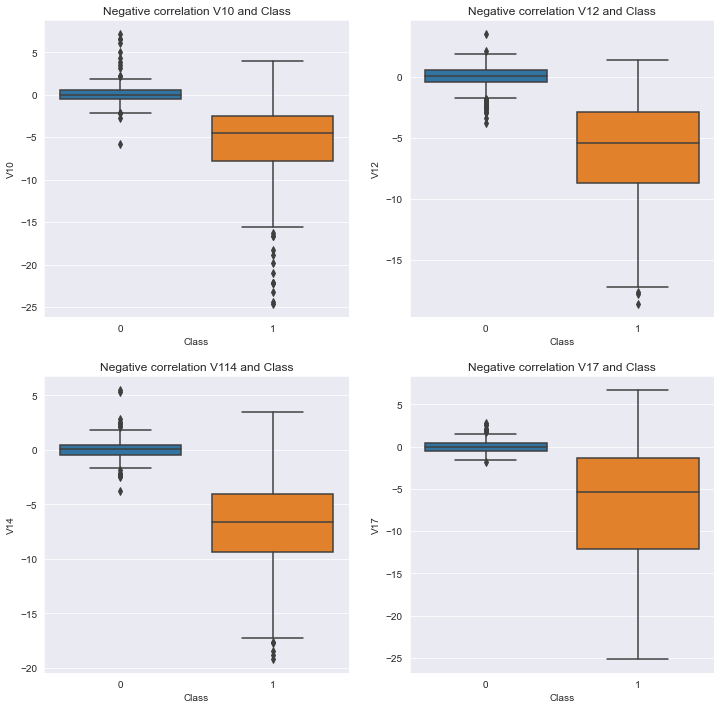

In [54]:
f, axes = plt.subplots(ncols=2, nrows=2, figsize=(12,12))

#V2 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V10", ax=axes[0][0])
axes[0][0].set_title("Negative correlation V10 and Class")

#V4 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V12", ax=axes[0][1])
axes[0][1].set_title("Negative correlation V12 and Class")

#V11 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V14", ax=axes[1][0])
axes[1][0].set_title("Negative correlation V114 and Class")

#V19 vs Class
sns.boxplot(data=undersampled_data, x="Class", y="V17", ax=axes[1][1])
axes[1][1].set_title("Negative correlation V17 and Class")

plt.show()

### 2.5 Outlier Removal

## Modeling

In [58]:
#Split the features from the target variable
X = undersampled_data.drop("Class", axis=1)
y = undersampled_data["Class"]

In [59]:
#PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
X_reduced_pca = pca.fit_transform(X)

In [64]:
#Check the PCA model attributes
print(X_reduced_pca)

print(pca.explained_variance_ratio_)

[[45.7035823  20.40787787]
 [ 4.31963106 -4.10995404]
 [40.10889116 -1.10276633]
 ...
 [-9.50689342  0.98293943]
 [-9.60697394  0.63146567]
 [-9.60355727  0.74585616]]
[0.61197429 0.10613848]


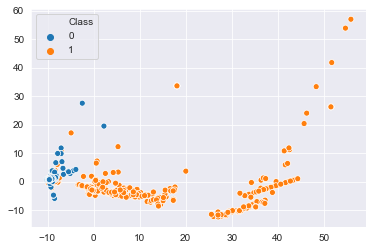

In [61]:
sns.scatterplot(x=X_reduced_pca[:, 0], y=X_reduced_pca[:, 1], hue=y)
plt.show()

In [65]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

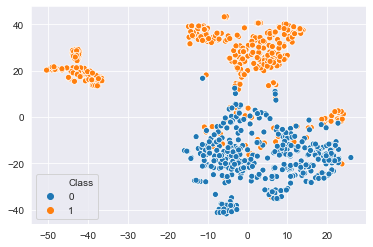

In [68]:
sns.scatterplot(x=X_reduced_tsne[:, 0], y=X_reduced_tsne[:, 1], hue=y)
plt.show()